# 使用手寫辨識資料集, 觀察 PCA 算法

# [教學目標]
- 以 PCA + 邏輯斯迴歸判斷手寫辨識資料集, 觀察不同 component 下正確率的變化
- 因為非監督模型的效果, 較難以簡單的範例看出來  
  所以非監督偶數日提供的範例與作業, 主要目的在於觀察非監督模型的效果,  
  同學只要能感受到模型效果即可, 不用執著於搞懂程式的每一個部分

# [範例重點]
- 以手寫辨識資料集, 觀察 PCA 算法取不同 component 時, PCA 解釋度與分類正確率如何變化 (In[5], Out[5])

In [7]:
# 載入套件
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

In [8]:
# 定義 PCA 與隨後的邏輯斯迴歸函數
logistic = SGDClassifier(loss='log', penalty='l2', max_iter=10000, tol=1e-5, random_state=0)
pca = PCA()
pipe = Pipeline(steps=[('pca', pca), ('logistic', logistic)])

# 載入手寫數字辨識集
digits = datasets.load_digits()
X_digits = digits.data
y_digits = digits.target

In [9]:
# 先執行 GridSearchCV 跑出最佳參數
param_grid = {
    'pca__n_components': [4, 10, 20, 30, 40, 50, 64],
    'logistic__alpha': np.logspace(-4, 4, 5),
}
search = GridSearchCV(pipe, param_grid, iid=False, cv=5, return_train_score=False)
search.fit(X_digits, y_digits)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

Best parameter (CV score=0.915):
{'logistic__alpha': 0.01, 'pca__n_components': 64}


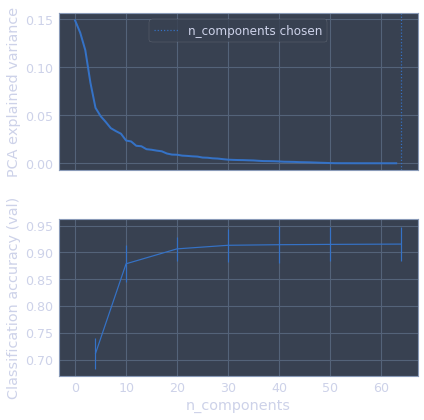

In [16]:
# 繪製不同 components 的 PCA 解釋度
pca.fit(X_digits)

fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(6, 6))
ax0.plot(pca.explained_variance_ratio_, linewidth=2)
ax0.set_ylabel('PCA explained variance')

ax0.axvline(search.best_estimator_.named_steps['pca'].n_components, linestyle=':', label='n_components chosen')
ax0.legend(prop=dict(size=12))
# 繪製不同採樣點的分類正確率
results = pd.DataFrame(search.cv_results_)
components_col = 'param_pca__n_components'
best_clfs = results.groupby(components_col).apply(lambda g: g.nlargest(1, 'mean_test_score'))

best_clfs.plot(x=components_col, y='mean_test_score', yerr='std_test_score', legend=False, ax=ax1)
ax1.set_ylabel('Classification accuracy (val)')
ax1.set_xlabel('n_components')
plt.tight_layout()
plt.show()

# 觀察結果
* explained variance ratio : 解釋變異性隨著 components 穩定下降
* 分類預測準確率 : 似乎也隨著 components 提升, 但是在 20 以後提升不多

In [12]:
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logistic__alpha,param_pca__n_components,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.084968,0.021294,0.000573,0.000015,0.0001,4,"{'logistic__alpha': 0.0001, 'pca__n_components...",0.702778,0.583333,0.679666,0.727019,0.685237,0.675607,0.049000,27
1,0.043311,0.002726,0.000677,0.000160,0.0001,10,"{'logistic__alpha': 0.0001, 'pca__n_components...",0.913889,0.841667,0.894150,0.910864,0.832869,0.878688,0.034593,16
2,0.054658,0.005680,0.000593,0.000011,0.0001,20,"{'logistic__alpha': 0.0001, 'pca__n_components...",0.919444,0.877778,0.908078,0.941504,0.885794,0.906520,0.023018,13
3,0.066271,0.008968,0.001327,0.001406,0.0001,30,"{'logistic__alpha': 0.0001, 'pca__n_components...",0.916667,0.877778,0.913649,0.955432,0.877437,0.908193,0.028997,12
4,0.067116,0.004104,0.000627,0.000014,0.0001,40,"{'logistic__alpha': 0.0001, 'pca__n_components...",0.908333,0.880556,0.924791,0.949861,0.885794,0.909867,0.025547,9
5,0.082521,0.009569,0.001073,0.000842,0.0001,50,"{'logistic__alpha': 0.0001, 'pca__n_components...",0.908333,0.880556,0.935933,0.949861,0.883008,0.911538,0.027741,7
6,0.090218,0.003457,0.000747,0.000135,0.0001,64,"{'logistic__alpha': 0.0001, 'pca__n_components...",0.911111,0.869444,0.933148,0.952646,0.877437,0.908757,0.031790,11
7,2.093822,0.676934,0.000627,0.000174,0.01,4,"{'logistic__alpha': 0.01, 'pca__n_components': 4}",0.730556,0.663889,0.732591,0.738162,0.690808,0.711201,0.029029,25
8,0.055998,0.009148,0.000600,0.000021,0.01,10,"{'logistic__alpha': 0.01, 'pca__n_components':...",0.902778,0.844444,0.891365,0.908078,0.824513,0.874236,0.033506,18
9,0.076408,0.007002,0.000591,0.000016,0.01,20,"{'logistic__alpha': 0.01, 'pca__n_components':...",0.925000,0.869444,0.910864,0.941504,0.866295,0.902621,0.030003,14


In [13]:
best_clfs

,,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logistic__alpha,param_pca__n_components,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
param_pca__n_components,,,,,,,,,,,,,,,,
4,7,2.093822,0.676934,0.000627,0.000174,0.01,4,"{'logistic__alpha': 0.01, 'pca__n_components': 4}",0.730556,0.663889,0.732591,0.738162,0.690808,0.711201,0.029029,25
10,1,0.043311,0.002726,0.000677,0.000160,0.0001,10,"{'logistic__alpha': 0.0001, 'pca__n_components...",0.913889,0.841667,0.894150,0.910864,0.832869,0.878688,0.034593,16
20,2,0.054658,0.005680,0.000593,0.000011,0.0001,20,"{'logistic__alpha': 0.0001, 'pca__n_components...",0.919444,0.877778,0.908078,0.941504,0.885794,0.906520,0.023018,13
30,10,0.098574,0.006823,0.000609,0.000018,0.01,30,"{'logistic__alpha': 0.01, 'pca__n_components':...",0.927778,0.891667,0.924791,0.955432,0.866295,0.913193,0.030965,4
40,18,1.105638,0.101506,0.000774,0.000049,1,40,"{'logistic__alpha': 1.0, 'pca__n_components': 40}",0.938889,0.886111,0.919220,0.961003,0.866295,0.914304,0.034377,3
50,12,0.123990,0.012593,0.000740,0.000136,0.01,50,"{'logistic__alpha': 0.01, 'pca__n_components':...",0.925000,0.894444,0.947075,0.944290,0.863510,0.914864,0.031813,2
64,13,0.142816,0.021847,0.000751,0.000015,0.01,64,"{'logistic__alpha': 0.01, 'pca__n_components':...",0.922222,0.891667,0.949861,0.947075,0.866295,0.915424,0.032286,1
